## Assignment 10_FRossetti

We start with precedent code

In [1]:
ExternalFilesFolder = "/Users/federicarossetti/Desktop/github/python4ScientificComputing_Numpy_Pandas_MATPLotLIB/ExternalFiles"
ConsumptionFileName = "consumption_5545.csv"
TemperatureFileName = "Austin_weather_2014.csv"
IrradianceFileName = "irradiance_2014_gen.csv"

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path_consumptionFile = os.path.join(ExternalFilesFolder, ConsumptionFileName)
path_Temperaturefile = os.path.join(ExternalFilesFolder, TemperatureFileName)
path_Irradiance = os.path.join(ExternalFilesFolder, IrradianceFileName)

In [2]:
# CONSUMPTION
DF_consumption=pd.read_csv(path_consumptionFile,sep=",",index_col=0)
PreviousIndex=DF_consumption.index
NewParsedIndex=pd.to_datetime(PreviousIndex)
DF_consumption.index=NewParsedIndex
DF_consumption_someDaysInJuly=DF_consumption["2014-07-01 00:00:00":"2014-07-03 23:00:00"]

# TEMPERATURE
DF_weather=pd.read_csv(path_Temperaturefile, sep=";", index_col=0) 
PreviousIndex_weather=DF_weather.index
newIndex_weather=pd.to_datetime(PreviousIndex_weather)
DF_weather.index=newIndex_weather
DF_weather.columns
DF_Temperature=DF_weather[["temperature"]]
DF_Temperature_someDaysInJuly=DF_Temperature["2014-07-01 00:00:00":"2014-07-03 23:00:00"]


#IRRADIANCE
DF_irradianceSource=pd.read_csv(path_Irradiance, sep=";", index_col=1)
DF_irradiance=DF_irradianceSource[["gen"]]
DF_irradiance[DF_irradiance["gen"]<0]=0
PreviousIndex_irradiance=DF_irradiance.index
newIndex_irradiance=pd.to_datetime(PreviousIndex_irradiance)
DF_irradiance.index=newIndex_irradiance
DF_irradiance_someDaysInJuly=DF_irradiance["2014-07-01 00:00:00":"2014-07-03 23:00:00"]


/Users/federicarossetti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/federicarossetti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/pandas/core/frame.py:2346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
/Users/federicarossetti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/pandas/core/frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

In [3]:
DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_mod = DF_joined.copy()
DF_mod.head()
DF_mod["temperature"]=DF_mod["temperature"].shift(-5) 
DF_mod.dropna(inplace=True) 
DF_mod.head()
DF_mod.describe()

,air conditioner_5545,temperature,gen
count,8670.000000,8670.000000,8670.000000
mean,345.707233,67.717625,0.975530
std,655.969001,16.256376,1.421250
min,0.000000,20.730000,0.000000
25%,0.000000,56.630000,0.000000
50%,0.000000,70.250000,0.012317
75%,411.575000,79.480000,1.669108
max,2841.000000,101.050000,5.099667


In [4]:
column_name="temperature"
df=DF_mod

def lag_feature(df,column_name,lag_start,lag_end,lag_interval):
    for i in range(lag_start,lag_end+1,lag_interval):
        new_column_name = column_name+" -"+str(i)+"hr"
        print new_column_name
        df[new_column_name]=df[column_name].shift(i)   
        df.dropna(inplace=True) 
    return df
    
DF_mod=lag_feature(DF_mod,"temperature",1,6,1) 
DF_mod=DF_mod.rename(columns={"air conditioner_5545":"AC_consumption","gen":"irradiance"})

DF_mod=  lag_feature(DF_mod,"temperature",1,6,1)
DF_mod=  lag_feature(DF_mod,"irradiance",3,6,1)
DF_mod=  lag_feature(DF_mod,"AC_consumption",1,24,1)

DF_mod["hour"]=DF_mod.index.hour
DF_mod["sin_hour"]=np.sin(DF_mod.index.hour*2*np.pi/24)
DF_mod["cos_hour"]=np.cos(DF_mod.index.hour*2*np.pi/24)

DF_mod["day_of_week"]=DF_mod.index.dayofweek
DF_mod["month"]=DF_mod.index.month
DF_mod["week_of_year"]=DF_mod.index.week

def WeekendDetector(day):
    if (day==5 or day == 6):
        weekendLabel=1
    else:
        weekendLabel=0
    return weekendLabel
    
def DayDetector(hour):
    if (hour< 19 and hour>=9):
        DayLabel=1
    else:
        DayLabel=0
    return DayLabel

DF_mod["weekend"]= DF_mod["day_of_week"].apply(WeekendDetector)
DF_mod["workingTime"] = DF_mod["hour"].apply(DayDetector)


temperature -1hr
temperature -2hr
temperature -3hr
temperature -4hr
temperature -5hr
temperature -6hr
temperature -1hr
temperature -2hr
temperature -3hr
temperature -4hr
temperature -5hr
temperature -6hr
irradiance -3hr
irradiance -4hr
irradiance -5hr
irradiance -6hr
AC_consumption -1hr
AC_consumption -2hr
AC_consumption -3hr
AC_consumption -4hr
AC_consumption -5hr
AC_consumption -6hr
AC_consumption -7hr
AC_consumption -8hr
AC_consumption -9hr
AC_consumption -10hr
AC_consumption -11hr
AC_consumption -12hr
AC_consumption -13hr
AC_consumption -14hr
AC_consumption -15hr
AC_consumption -16hr
AC_consumption -17hr
AC_consumption -18hr
AC_consumption -19hr
AC_consumption -20hr
AC_consumption -21hr
AC_consumption -22hr
AC_consumption -23hr
AC_consumption -24hr


In [5]:
DF_mod.corr()
DF_mod.info()
DF_mod=DF_mod["2014-03-01":"2014-09-30"]
DF_target=DF_mod["AC_consumption"] 
DF_features=DF_mod.drop("AC_consumption",axis=1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8310 entries, 2014-01-16 06:00:00 to 2014-12-31 00:00:00
Data columns (total 45 columns):
AC_consumption          8310 non-null float64
temperature             8310 non-null float64
irradiance              8310 non-null float64
temperature -1hr        8310 non-null float64
temperature -2hr        8310 non-null float64
temperature -3hr        8310 non-null float64
temperature -4hr        8310 non-null float64
temperature -5hr        8310 non-null float64
temperature -6hr        8310 non-null float64
irradiance -3hr         8310 non-null float64
irradiance -4hr         8310 non-null float64
irradiance -5hr         8310 non-null float64
irradiance -6hr         8310 non-null float64
AC_consumption -1hr     8310 non-null float64
AC_consumption -2hr     8310 non-null float64
AC_consumption -3hr     8310 non-null float64
AC_consumption -4hr     8310 non-null float64
AC_consumption -5hr     8310 non-null float64
AC_consumption -6hr     8310 

Now we want to create a code able to analize a very big quantity of data, searching inside the data cyclic patterns such that extract automatically the algorithm needed to solve the job. This is useful to make prediction. This belongs to the Machine learning concept. To do this we have to divide our data in two macro categories: Training set and Test set.
Training set is the part of data used to create the model and it's a list of pratictal examples in which we build the algorithm.
The Test set is instead the part of data used to verify that the model works.

There are some methods used to predict the output and these are:
 1. Linear Regression
 2. Random Forest

### 1. Linear Regression

The linear regression is a statistic process looking for a relationship between two or more variables. 
Scikit-learn is a free software machine learning library for the Python programming language. DF:features represents the input and DF_target is the output. In this case we use a size of 0,2. This means that the training set is made by the 20 % of data choosen randomly.
The function used to do this in phyton is:

In [6]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(DF_features,DF_target,test_size=0.2, random_state=41234)

from sklearn import linear_model
linear_reg=linear_model.LinearRegression()

So, we are working on the training set with the linear regression. The code creates a linear function between inputs (X_train) and outputs (Y_train): 

In [7]:
linear_reg.fit(X_train, Y_train)
predicted_linearReg_split=linear_reg.predict(X_test)


The code "fit" allows to create the straight line which gets closer to our data.

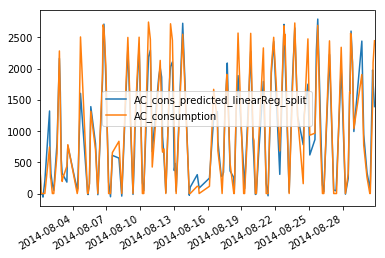

In [8]:
predicted_DF_linearReg_split=pd.DataFrame(predicted_linearReg_split, index=Y_test.index, columns=["AC_cons_predicted_linearReg_split"])
predicted_DF_linearReg_split=predicted_DF_linearReg_split.join(Y_test)
predicted_DF_linearReg_split_august=predicted_DF_linearReg_split["2014-08-01":"2014-08-30"]
predicted_DF_linearReg_split_august.plot()
plt.show()

After having define the model we have to test its accuracy.
For this we introduce some statistics parameters used to evaluate precision of a prediction. These parameters are:
- Mean absolute errore
- Mean squared error
- Coefficient of determination R2

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

MAE_linearReg_split=mean_absolute_error(predicted_linearReg_split,Y_test)
MSE_linearReg_split=mean_squared_error(predicted_linearReg_split,Y_test)
R2_linearReg_split=r2_score(predicted_linearReg_split,Y_test)

In [10]:
R2_linearReg_split

0.87578696798025502

The R2_linearReg_split gives us infomations about the accuracy of the method. The closer to one you are the more you have an accurated method.

#### K-fold Cross validation 

In the line code above we choose the training set and test set choosing the 20% random of data. This can be a little accurated way because it depends from how much lucky our choice is. To solve this problem we introduce a method used to choose more accurately our training set: The k-fold Cross Validation.
Here we don't choose random data but we divide our total database into k-equal parts. At any step, the nth part of the dataset becomes the validation datset, the remaining part is the training set. So, this is a more accurate model than last one because we test the model for each k-part.

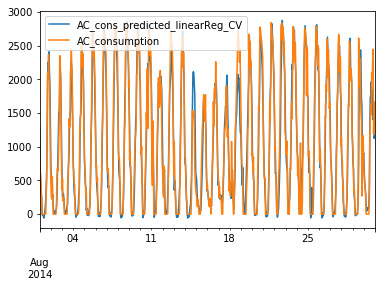

In [11]:
from sklearn.model_selection import cross_val_predict
predict_linearReg_CV=cross_val_predict(linear_reg,DF_features,DF_target, cv=10)
predicted_DF_linearReg_CV=pd.DataFrame(predict_linearReg_CV, index=DF_target.index, columns=["AC_cons_predicted_linearReg_CV"])
predicted_DF_linearReg_CV=predicted_DF_linearReg_CV.join(DF_target)
predicted_DF_linearReg_CV_august=predicted_DF_linearReg_CV["2014-08-01":"2014-08-30"]
predicted_DF_linearReg_CV_august.plot()
plt.show()

As done before, we use statistic parameters to see the accuracy of the model.

In [12]:
MAE_linearReg_split_CV=mean_absolute_error(predict_linearReg_CV,DF_target)
MSE_linearReg_split_CV=mean_squared_error(predict_linearReg_CV,DF_target)
R2_linearReg_CV=r2_score(predict_linearReg_CV,DF_target)

In [13]:
R2_linearReg_CV

0.87811134648151568

Note that the R2 value is higher than the previous case of random choiche.

### 2. Random Forest

It's the second method based on decision trees. 

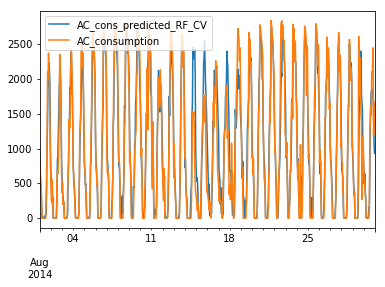

In [14]:
from sklearn.ensemble import RandomForestRegressor
reg_RF=RandomForestRegressor()
predict_RF_CV=cross_val_predict(reg_RF,DF_features,DF_target, cv=10)
predicted_DF_RF_CV=pd.DataFrame(predict_RF_CV, index=DF_target.index, columns=["AC_cons_predicted_RF_CV"])
predicted_DF_RF_CV=predicted_DF_RF_CV.join(DF_target)
predicted_DF_RF_CV_august=predicted_DF_RF_CV["2014-08-01":"2014-08-30"]
predicted_DF_RF_CV_august.plot()
plt.show()

In [17]:
MAE_RF_CV=mean_absolute_error(predict_linearReg_CV,DF_target)
MSE_linearReg_CV=mean_squared_error(predict_linearReg_CV,DF_target)
R2_linearReg_CV=r2_score(predict_linearReg_CV,DF_target)
R2_RF_CV=r2_score(predict_RF_CV,DF_target)

In [18]:
R2_RF_CV

0.90239169234034411

This is a more accurated method since we're closer to 1.

### Online learning

With this method we can choose a selected range of data, using only useful data and not the entire data set. This is useful when we have a large quantity of data and we need only a part not the entire one.
For example, if we want to do a prediction of july we don't care about winter months but we're interesting in summer months. Online learning allows us to continuosly update the training set to have a more realistic prediction instead of previous methods which generate the best prediction by learning on the entire training data set at once.
We use the month of March as training set and from the first hour of April as test set. So we start with an empty dataframe DF_onlineConsumptionPrediction which we're going to fill with predictions. The period of training is the entire month of March. 

In [19]:
DF_onlineConsumptionPrediction=pd.DataFrame(index=DF_mod.index)
period_of_training=pd.Timedelta(30,unit="d")
FirstTimeStamp_measured=DF_mod.index[0] # It's the first of March (training set)
LastTimeStamp_measured=DF_mod.index[-1] # It's the 31 of March (test set)
FirstTimeStamp_toPredict=FirstTimeStamp_measured+period_of_training
training_startTimeStamp=FirstTimeStamp_measured
training_endTimeStamp=FirstTimeStamp_toPredict 

We're considering a period of 1 month "30 d". In the first cycle we use the linear regression.

In [20]:
timeStamp_toPredict=FirstTimeStamp_toPredict
DF_onlineConsumptionPrediction=DF_onlineConsumptionPrediction.truncate(before=training_endTimeStamp)

In [21]:
while(timeStamp_toPredict<LastTimeStamp_measured):
    DF_feature_train=DF_features.truncate(before=training_startTimeStamp,after=training_endTimeStamp)
    DF_target_train=DF_target.truncate(before=training_startTimeStamp,after=training_endTimeStamp)
    DF_feature_test=DF_features.loc[timeStamp_toPredict].values.reshape(1,-1)
    DF_target_test=DF_target.loc[timeStamp_toPredict]
    linear_reg.fit(DF_feature_train,DF_target_train)
    predicted_Consumption= linear_reg.predict(DF_feature_test)
    DF_onlineConsumptionPrediction.loc[timeStamp_toPredict,"Predicted"]=predicted_Consumption
    DF_onlineConsumptionPrediction.loc[timeStamp_toPredict,"Real"]=DF_target_test

    timeStamp_toPredict=timeStamp_toPredict+pd.Timedelta(1,unit="h")
    training_endTimeStamp=training_endTimeStamp+pd.Timedelta(1,unit="h")
    training_startTimeStamp=training_startTimeStamp+pd.Timedelta(1,unit="h")
        
DF_onlineConsumptionPrediction.dropna(inplace=True)

R2_score_online_linearReg=r2_score(DF_onlineConsumptionPrediction[["Real"]],DF_onlineConsumptionPrediction["Predicted"])


In [ ]:
R2_score_online_linearReg

0.91488035385293587

Now we rewrite the cycle using the random forest method to improve the accuracy.

In [ ]:
FirstTimeStamp_toPredict=FirstTimeStamp_measured+period_of_training

training_startTimeStamp=FirstTimeStamp_measured
training_endTimeStamp=FirstTimeStamp_toPredict 
timeStamp_toPredict=FirstTimeStamp_toPredict
DF_onlineConsumptionPrediction=DF_onlineConsumptionPrediction.truncate(before=training_endTimeStamp) # questa riga l'ho aggiunta dopo  DF_onlineConsumptionPrediction.loc[timeStamp_toPredict,"Predicted"]=predicted_Consumption

while(timeStamp_toPredict<LastTimeStamp_measured):
    DF_feature_train=DF_features.truncate(before=training_startTimeStamp,after=training_endTimeStamp)
    DF_target_train=DF_target.truncate(before=training_startTimeStamp,after=training_endTimeStamp)
    
    DF_feature_test=DF_features.loc[timeStamp_toPredict].values.reshape(1,-1)
    DF_target_test=DF_target.loc[timeStamp_toPredict]
    reg_RF.fit(DF_feature_train,DF_target_train)
    predicted_Consumption= reg_RF.predict(DF_feature_test)
    DF_onlineConsumptionPrediction.loc[timeStamp_toPredict,"Predicted"]=predicted_Consumption
    DF_onlineConsumptionPrediction.loc[timeStamp_toPredict,"Real"]=DF_target_test

    timeStamp_toPredict=timeStamp_toPredict+pd.Timedelta(1,unit="h")
    training_endTimeStamp=training_endTimeStamp+pd.Timedelta(1,unit="h")
    training_startTimeStamp=training_startTimeStamp+pd.Timedelta(1,unit="h")
        
DF_onlineConsumptionPrediction.dropna(inplace=True)

R2_score_online_reg_RF=r2_score(DF_onlineConsumptionPrediction[["Real"]],DF_onlineConsumptionPrediction["Predicted"])


R2_score_online_reg_RF